In [2]:
#librerias para el desarrollo del proyecto
import matplotlib.pyplot as plt #libreria para graficas
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.ticker import StrMethodFormatter
import seaborn as sb

#librerias pandas para el manejo de los datos
import pandas as pd
import pandas as pq
import pandas as pf
import pandas as filtro_filas

#enlazando los datos en el archivo excel
data = pd.read_csv("..//Investigacion_GarciaMantilla_Beta//dataset/balanced_asthma_data.csv",index_col=None)
import numpy as np
#invocando a la libreria de clasificacion
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data

,Age,Gender,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,20,1,33.886031,0,4.595356,6.959898,7.285367,9.231719,6.819926,8.549190,...,0,2.286159,4.166892,0,0,1,0,1,1,0
1,25,1,17.224128,0,6.662798,9.185231,7.541372,7.383328,7.642245,4.391036,...,1,3.801720,1.545632,1,0,1,1,1,1,0
2,22,0,33.132543,0,0.661809,8.075337,7.515110,0.171417,7.082410,0.513752,...,0,3.111974,4.757702,0,0,0,0,1,1,1
3,16,0,18.443936,0,8.449035,1.947972,4.418452,3.695000,8.863830,4.435264,...,0,1.002701,2.552313,1,1,0,1,1,0,0
4,17,1,28.950481,0,6.684112,9.400223,8.855627,0.254491,2.995577,1.832313,...,1,1.747205,4.440667,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,19,1,19.756048,0,6.420823,6.201288,4.254204,5.232450,3.792215,1.404334,...,1,1.873455,4.250478,1,0,0,1,1,0,0
244,43,0,25.456598,0,5.015210,6.357468,5.032083,5.157006,3.207200,6.816216,...,0,1.016759,5.639170,0,1,1,0,1,0,0
245,74,1,21.747139,0,2.854721,1.539329,9.851319,5.898040,7.142917,7.201877,...,0,3.704114,3.506861,1,0,1,0,1,0,0
246,63,0,38.963541,0,3.348232,2.104754,4.253407,4.122600,2.649770,7.076368,...,0,2.935107,5.715171,1,0,1,1,0,1,1


In [6]:
data.shape

(248, 25)

In [8]:
data.isnull().sum()

Age                       0
Gender                    0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
dtype: int64

In [10]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     248 non-null    int64  
 1   Gender                  248 non-null    int64  
 2   BMI                     248 non-null    float64
 3   Smoking                 248 non-null    int64  
 4   PhysicalActivity        248 non-null    float64
 5   DietQuality             248 non-null    float64
 6   SleepQuality            248 non-null    float64
 7   PollutionExposure       248 non-null    float64
 8   PollenExposure          248 non-null    float64
 9   DustExposure            248 non-null    float64
 10  PetAllergy              248 non-null    int64  
 11  FamilyHistoryAsthma     248 non-null    int64  
 12  HistoryOfAllergies      248 non-null    int64  
 13  Eczema                  248 non-null    int64  
 14  HayFever                248 non-null    in

In [12]:
#numero de missing por columnas
data.isnull().sum()

Age                       0
Gender                    0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
dtype: int64

In [14]:
#Columnas con missing
null_columns=data.columns[data.isnull().any()]

print(null_columns)

Index([], dtype='object')


<Axes: >

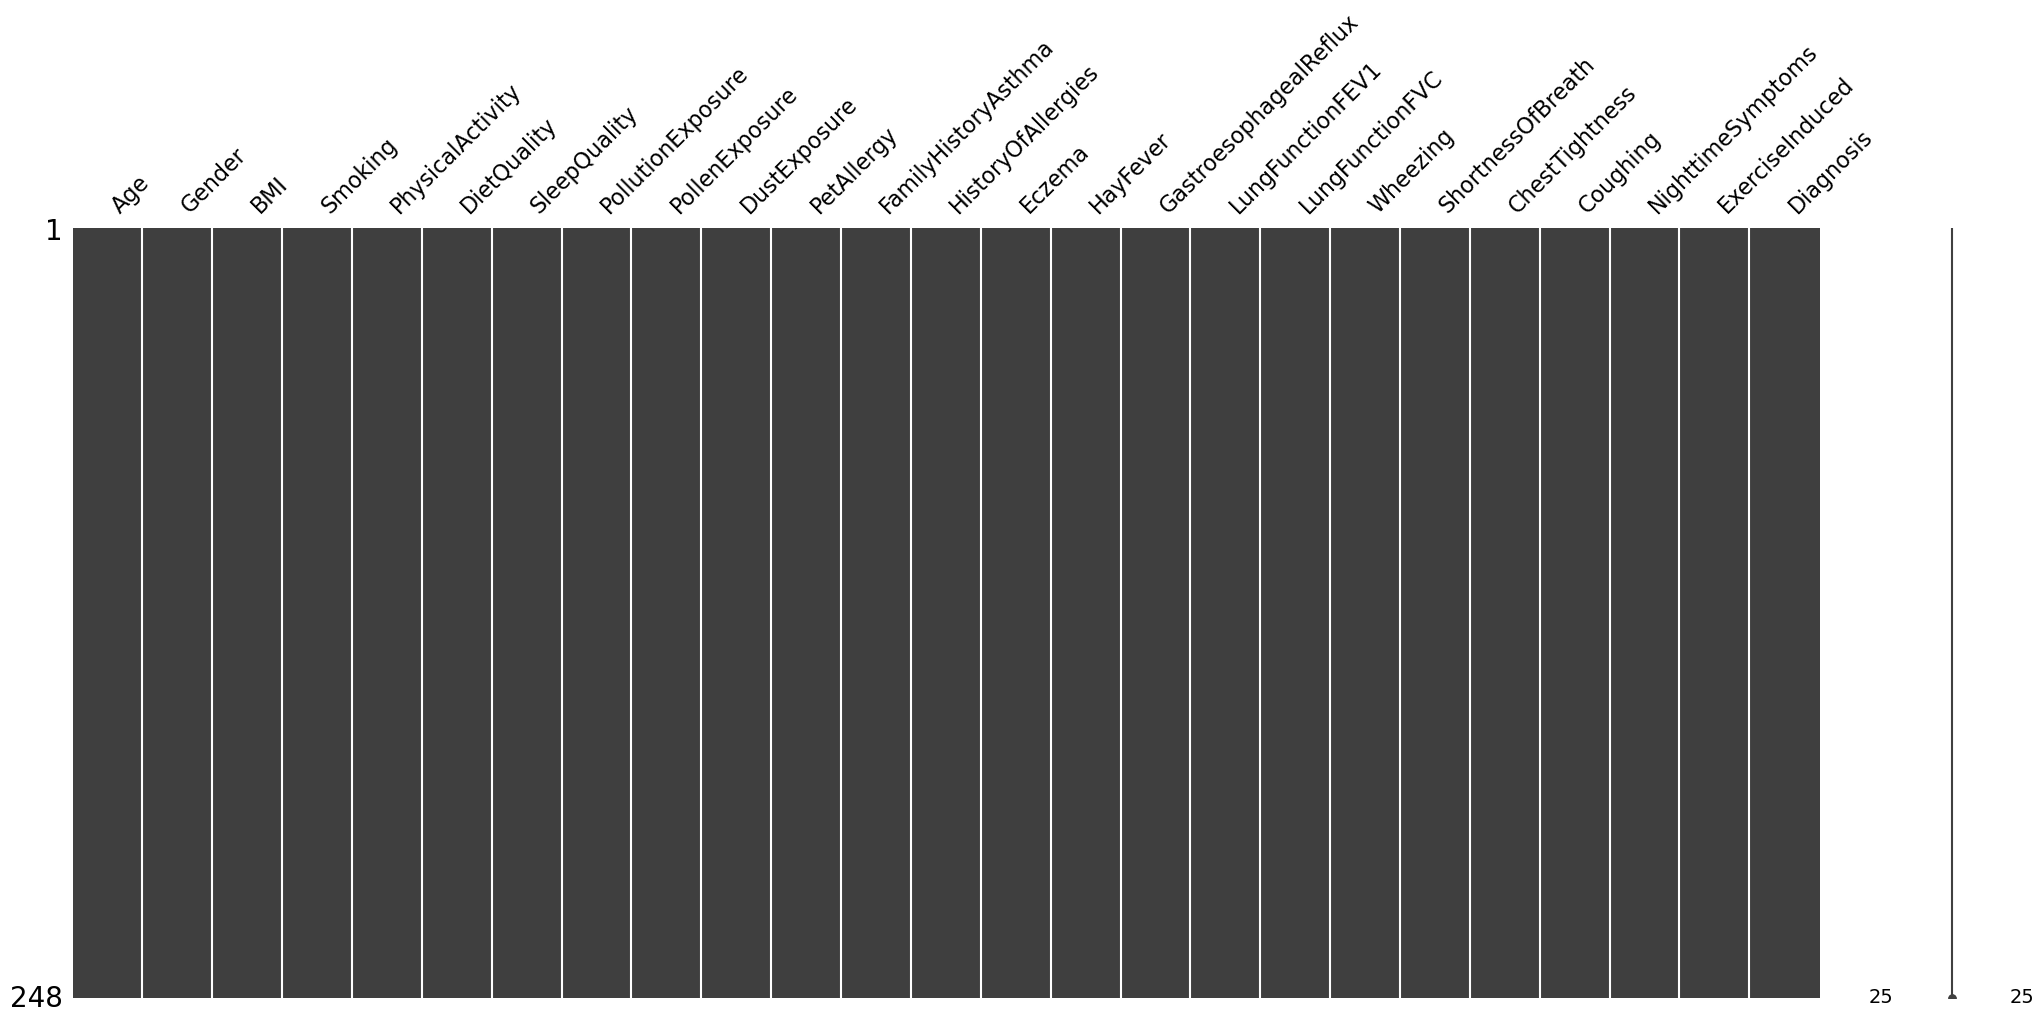

In [16]:
import missingno as msno
msno.matrix(data) 

In [17]:
# captura el numero de filas y columnas
rows = len(data.axes[0])
cols = len(data.axes[1])

# Imprimir el numero de filas y columnas
print("Numero de filas: " + str(rows))
print("Numero de columnas: " + str(cols))

Numero de filas: 248
Numero de columnas: 25


In [20]:
data.isnull().any()

Age                       False
Gender                    False
BMI                       False
Smoking                   False
PhysicalActivity          False
DietQuality               False
SleepQuality              False
PollutionExposure         False
PollenExposure            False
DustExposure              False
PetAllergy                False
FamilyHistoryAsthma       False
HistoryOfAllergies        False
Eczema                    False
HayFever                  False
GastroesophagealReflux    False
LungFunctionFEV1          False
LungFunctionFVC           False
Wheezing                  False
ShortnessOfBreath         False
ChestTightness            False
Coughing                  False
NighttimeSymptoms         False
ExerciseInduced           False
Diagnosis                 False
dtype: bool

In [22]:
#score = clf.score(X_train,y_train)

#https://www.aprendemachinelearning.com/sets-de-entrenamiento-test-validacion-cruzada/

In [24]:
#verificamos la edad de las personas para ver si estan dentro del rango
print(data.groupby('Age').size())

Age
5     5
6     2
7     5
9     2
10    5
     ..
75    4
76    2
77    5
78    3
79    2
Length: 73, dtype: int64


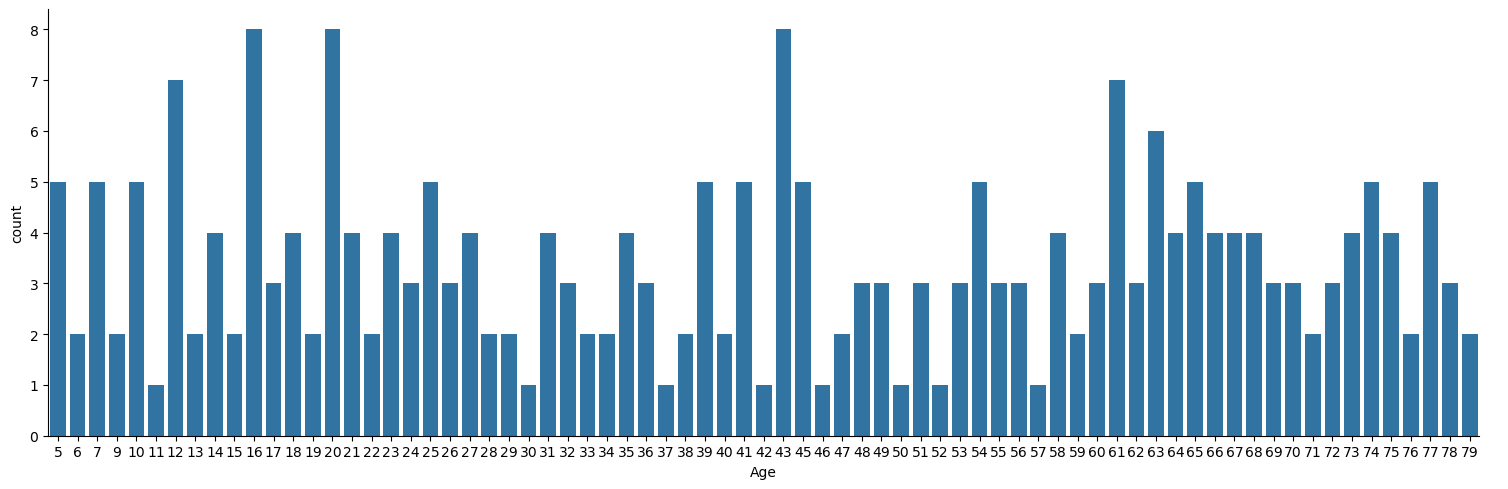

In [26]:
sb.catplot(x='Age', data=data, kind='count', aspect=3)

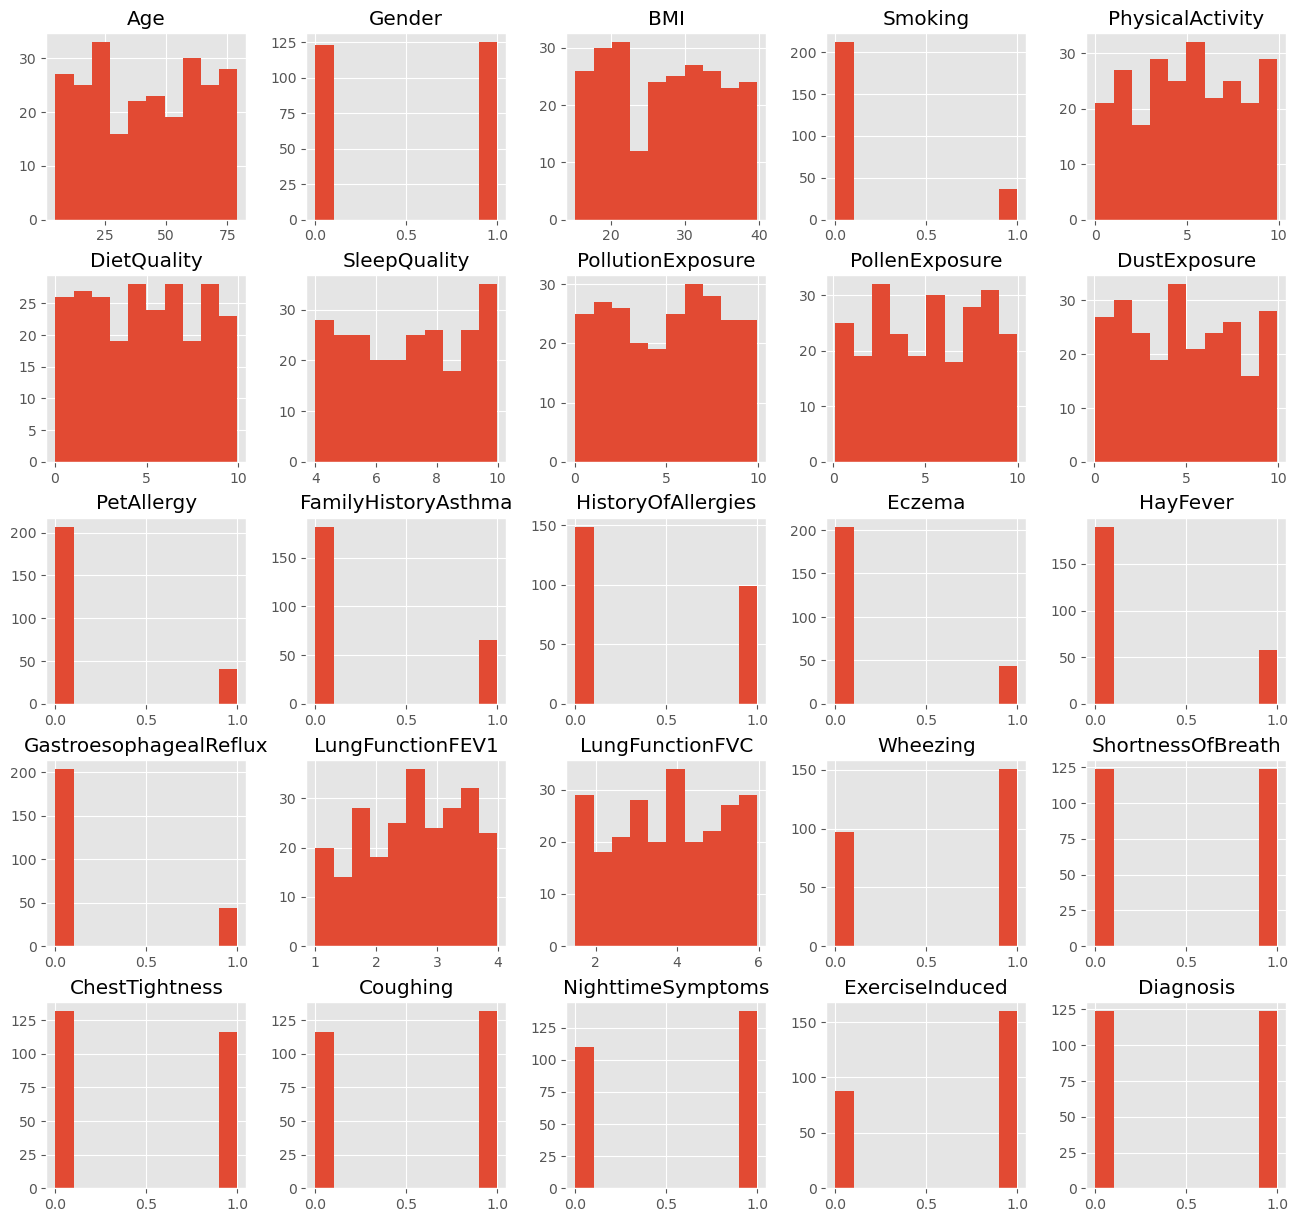

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 15)
plt.style.use('ggplot')
data.hist()
plt.show()

In [30]:
X = data[['Age', 'Gender', 'BMI', 'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced']].values

In [32]:
X.shape

(248, 24)

In [34]:
Y = data['Diagnosis']
#ya = data_datos["CALIFICACION"] 
Y.shape

(248,)

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# particionamiento de la data


In [39]:
#particionando la data en 0.8 para entrenar y 0.2 para validar
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_trainset.shape, y_trainset.shape)
print (X_testset.shape, y_testset.shape)

(198, 24) (198,)
(50, 24) (50,)


# Correlación de las variables

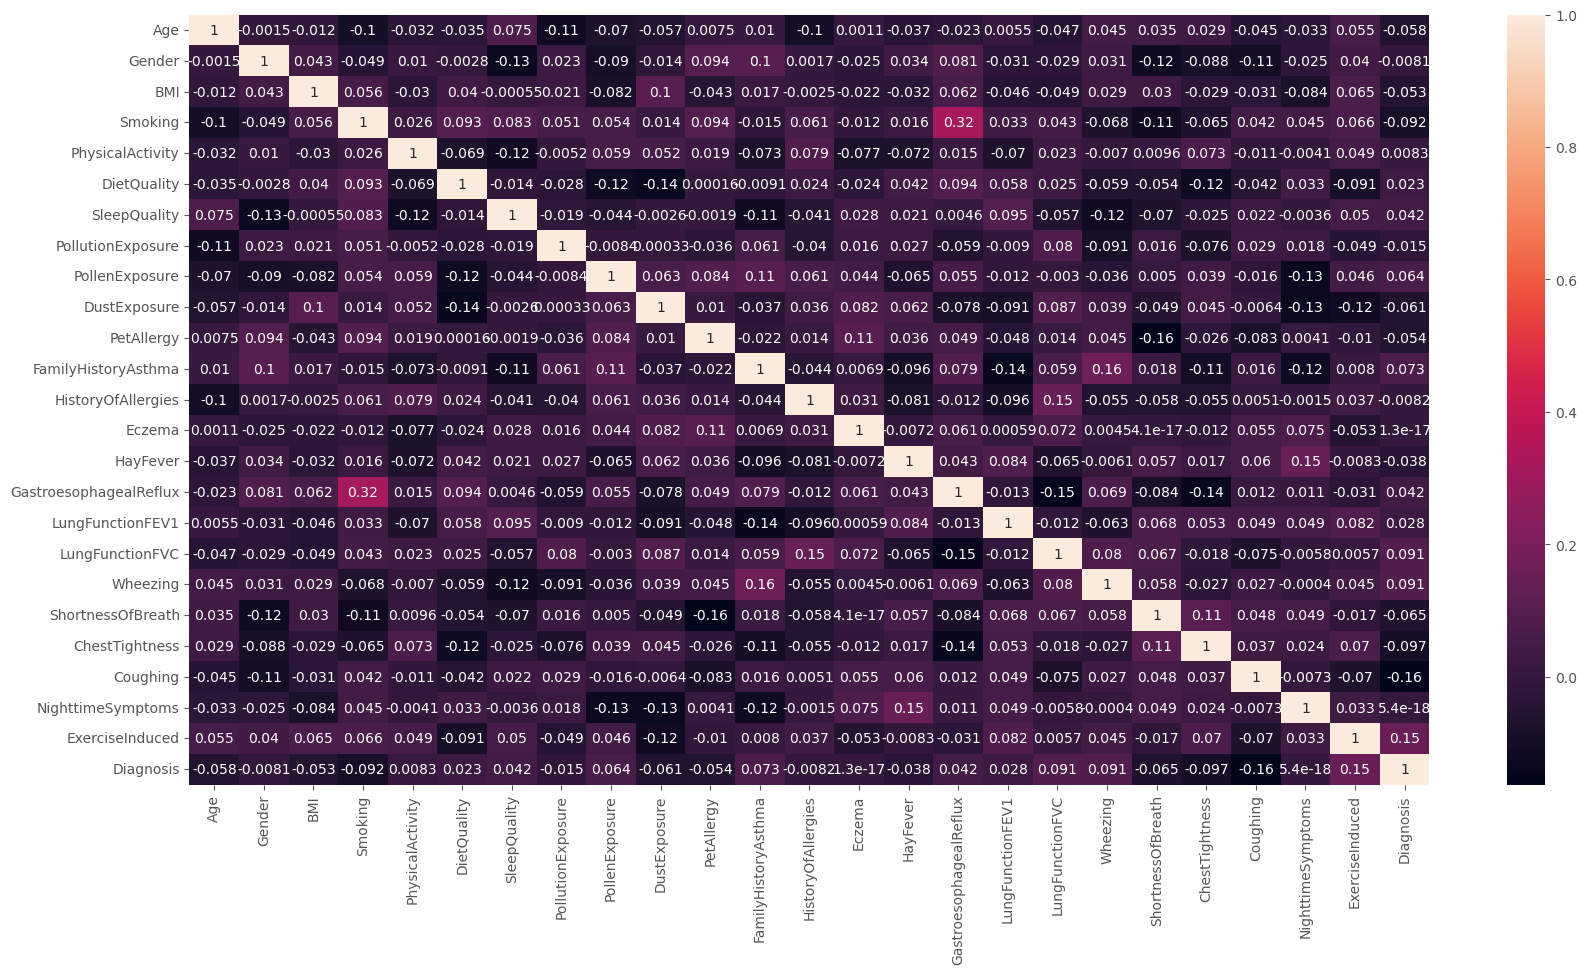

In [42]:
#correlacion de las variables

import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt
data
corr_df = data.corr(method='pearson')

plt.figure(figsize=(20,10))
sns.heatmap(corr_df, annot=True)
plt.show()

# Modelo KNN

In [45]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']}
  
grid = GridSearchCV(KNeighborsClassifier(), 
                    param_grid, 
                    refit = True, 
                    verbose = 3, 
                    cv = 5)
  
# fitting the model for grid search
grid.fit(X_trainset, y_trainset)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.550 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.500 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.450 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.462 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.550 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.500 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.450 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.590 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.462 to

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [47]:
print(grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [49]:
model = grid.best_estimator_
model

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [51]:
# validación cruzada
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 10)
scores = cross_val_score(model, X_trainset,y_trainset, cv = k_folds)
print(scores)

model.fit(X_trainset,y_trainset)

[0.55       0.5        0.6        0.6        0.5        0.5
 0.45       0.65       0.36842105 0.52631579]


KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

## Métricas del Modelo (Train)

In [54]:
pred = model.predict(X_trainset)

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [58]:
#Metricas del modelo
from sklearn.metrics import accuracy_score
print('el accuracy es :',accuracy_score(y_trainset, pred))

#Recall - sensibilidad
from sklearn.metrics import recall_score
print ('la sensibilidad es : ',recall_score(y_trainset, pred, average='macro'))

#f1_score
from sklearn.metrics import f1_score
print('el f1_score es: ', f1_score(y_trainset, pred, average='macro'))

#precision
from sklearn.metrics import precision_score
print('la precision es :',precision_score(y_trainset, pred, average='macro'))

el accuracy es : 1.0
la sensibilidad es :  1.0
el f1_score es:  1.0
la precision es : 1.0


In [60]:
print(classification_report(y_trainset, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        97

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198



In [62]:
matrix_de_confussion = pd.crosstab(y_trainset, pred, rownames = ['ACTUAL'],colnames=['PREDICCION'])
print(matrix_de_confussion)

PREDICCION    0   1
ACTUAL             
0           101   0
1             0  97


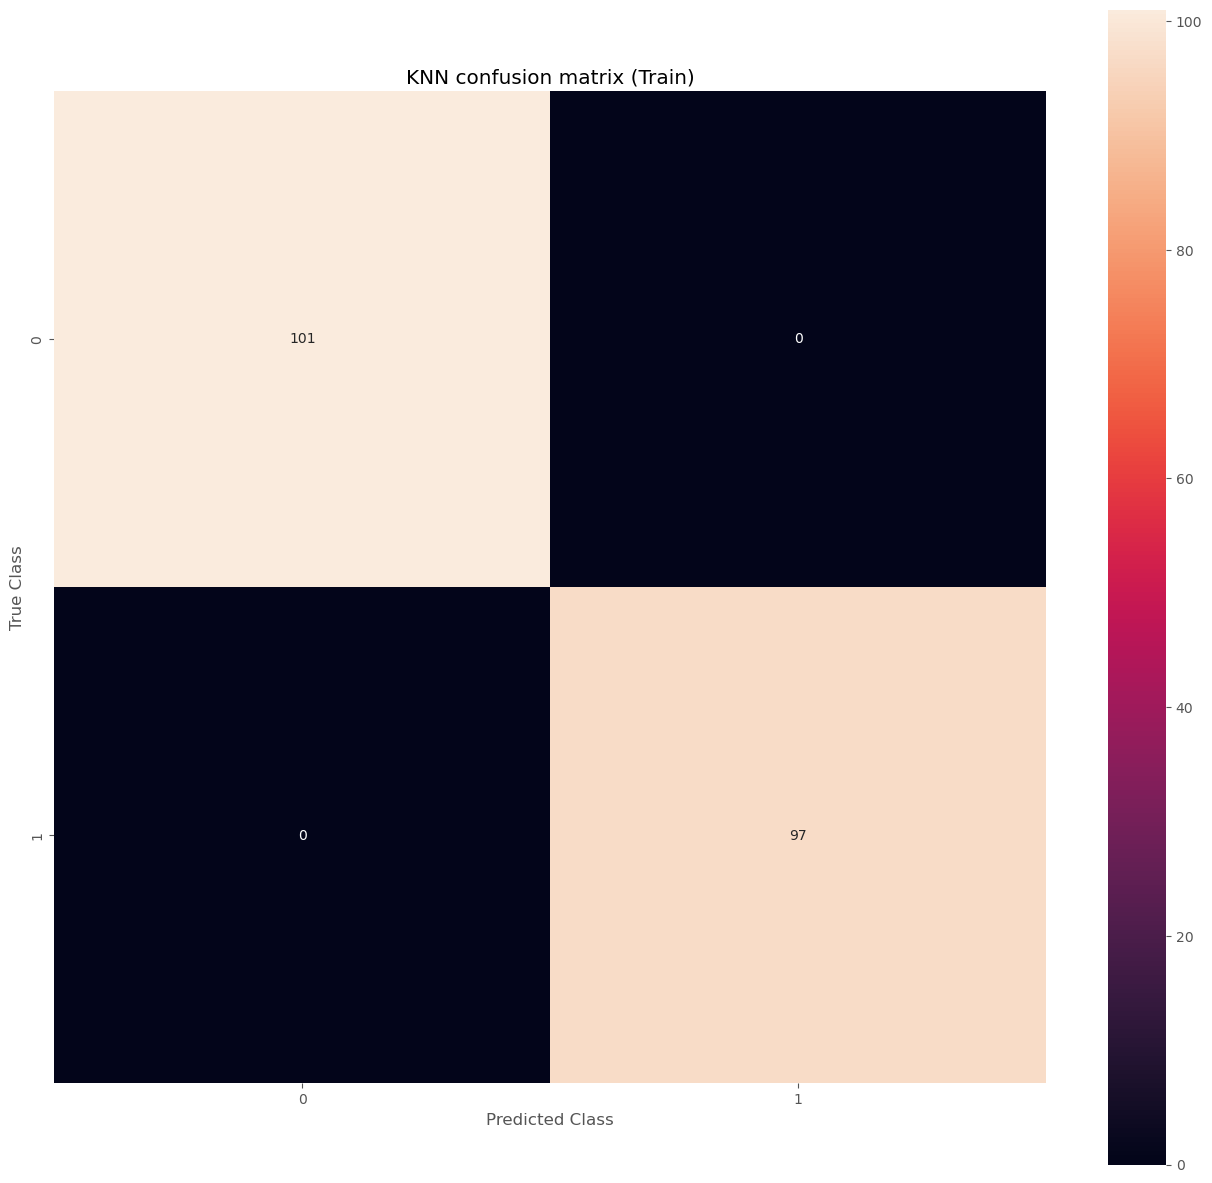

In [64]:
cnf_matrix= pd.crosstab(y_trainset, pred, rownames = ['ACTUAL'],colnames=['Prediccion'])
sb.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('KNN confusion matrix (Train)')
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()

## Métricas del Modelo (Test)

In [67]:
pred = model.predict(X_testset)

In [69]:
#Metricas del modelo
from sklearn.metrics import accuracy_score
print('el accuracy es :',accuracy_score(y_testset, pred))

#Recall - sensibilidad
from sklearn.metrics import recall_score
print ('la sensibilidad es : ',recall_score(y_testset, pred, average='macro'))

#f1_score
from sklearn.metrics import f1_score
print('el f1_score es: ', f1_score(y_testset, pred, average='macro'))

#precision
from sklearn.metrics import precision_score
print('la precision es :',precision_score(y_testset, pred, average='macro'))

el accuracy es : 0.66
la sensibilidad es :  0.6626409017713366
el f1_score es:  0.6598639455782312
la precision es : 0.6618589743589745


In [71]:
print(classification_report(y_testset, pred))

              precision    recall  f1-score   support

           0       0.62      0.70      0.65        23
           1       0.71      0.63      0.67        27

    accuracy                           0.66        50
   macro avg       0.66      0.66      0.66        50
weighted avg       0.67      0.66      0.66        50



In [73]:

matrix_de_confussion = pd.crosstab(y_testset, pred, rownames = ['ACTUAL'],colnames=['PREDICCION'])
print(matrix_de_confussion)

PREDICCION   0   1
ACTUAL            
0           16   7
1           10  17


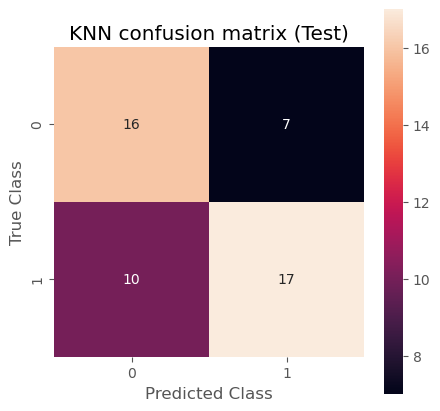

In [75]:
cnf_matrix= pd.crosstab(y_testset, pred, rownames = ['ACTUAL'],colnames=['Prediccion'])
sb.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('KNN confusion matrix (Test)')
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()

## ROC Curve (Train)

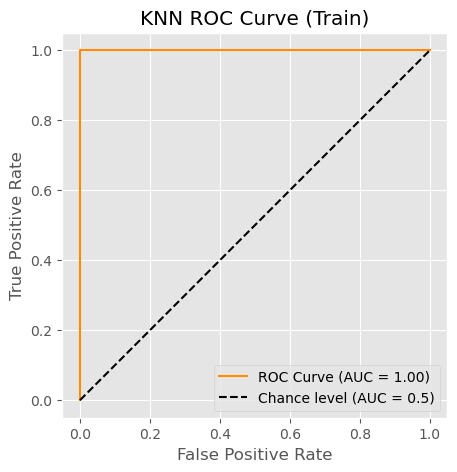

In [78]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from itertools import cycle

probs = model.predict_proba(X_trainset)
probs = probs[:,1]

RocCurveDisplay.from_predictions(
    y_trainset,
    probs,
    name="ROC Curve",
    color="darkorange",
)

plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.rcParams["figure.figsize"] = (4, 4)
plt.title("KNN ROC Curve (Train)")
plt.legend()
plt.show()

## ROC Curve (Test)

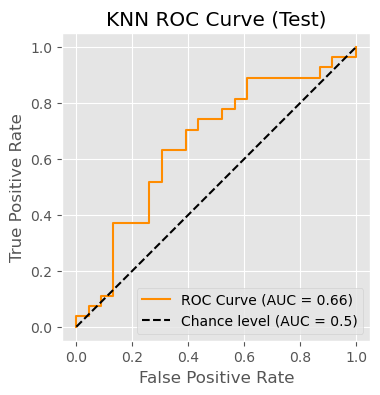

In [81]:
probs = model.predict_proba(X_testset)
probs = probs[:,1]

RocCurveDisplay.from_predictions(
    y_testset,
    probs,
    name="ROC Curve",
    color="darkorange",
)

plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve (Test)")
plt.legend()
plt.show()

## Precision Recall Curve (Train)

1.0


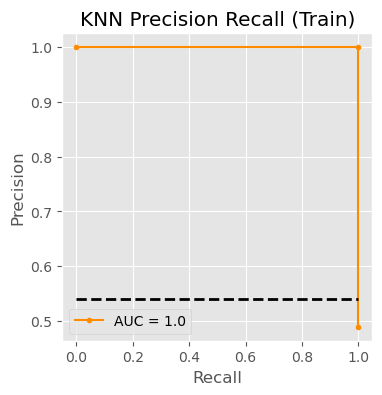

In [84]:
probs = model.predict_proba(X_trainset)
probs = probs[:,1]

lr_precision, lr_recall, _ = precision_recall_curve(y_trainset, probs)
roc_auc = auc(lr_recall, lr_precision)
print(roc_auc)

plt.plot(lr_recall, lr_precision, marker='.', label='AUC = {0}'.format(roc_auc.round(2)), color='darkorange')

no_skill = len(y_testset[y_testset==1]) / len(y_testset)
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
# show the legend
plt.legend(loc='best')
plt.title('KNN Precision Recall (Train)')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
# show the plot
plt.show()

## Precision Recall Curve (Test)

0.6540156227583507


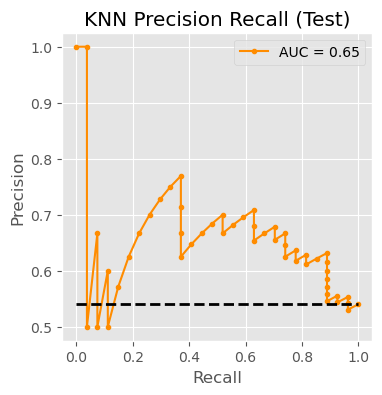

In [87]:
probs = model.predict_proba(X_testset)
probs = probs[:,1]

lr_precision, lr_recall, _ = precision_recall_curve(y_testset, probs)
roc_auc = auc(lr_recall, lr_precision)
print(roc_auc)

plt.plot(lr_recall, lr_precision, marker='.', label='AUC = {0}'.format(roc_auc.round(2)), color='darkorange')

no_skill = len(y_testset[y_testset==1]) / len(y_testset)
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
# show the legend
plt.legend(loc='best')
plt.title('KNN Precision Recall (Test)')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
# show the plot
plt.show()

In [89]:
import pickle
pickle.dump(model, open('..//Investigacion_GarciaMantilla_Beta//modelos//3_Knn_asthma.pkl', 'wb'))